# [FINAL] Early vote, as we understand it
Compare targetsmart's targetearly data vs final voter data

What is the question?

Does the early vote correlate with the final vote?

Does knowing the margin of the prev election help? Does knowing anything else help?

**part 1:** state | early vote dem margin | final dem margin

note: early vote dem margin is based on modelled party by targetearly

**then...** figure out if there is a correlation between early vote dem margin/ final dem margin based on state

**if i have more time:**
- add % total was early | 2020 early vote dem margin | 2020 final dem margin | ...
- do correlation exercise based on county

In [117]:
import pandas as pd

In [171]:
full_df = pd.read_csv('election_data.csv')

In [172]:
full_df.head()

,state,year,registered_total,early_d_votes,early_r_votes,early_total,final_d_votes,final_r_votes,final_total,prev_d_margin
0,Alaska,2024,611078,50580,67247,141849,139812,184204,337733,-0.03
1,Alaska,2020,646093,64714,90292,192346,153778,189951,359530,-0.03
2,Arizona,2024,4367593,1076917,1207619,2414835,1582860,1770242,3428011,0.11
3,Arizona,2020,4728109,1210818,1461474,2887775,1672143,1661686,3387326,-0.11
4,Arkansas,2024,1828129,220126,498882,787464,396905,759241,1182676,-0.06


In [173]:
full_df['early_d_margin'] = (full_df['early_d_votes'] - full_df['early_r_votes']) / full_df['early_total']
full_df['final_d_margin'] = (full_df['final_d_votes'] - full_df['final_r_votes']) / full_df['final_total']

full_df['early_d_pct'] = full_df['early_d_votes'] / full_df['early_total']
full_df['early_r_pct'] = full_df['early_r_votes'] / full_df['early_total']

full_df['final_d_pct'] = full_df['final_d_votes'] / full_df['final_total']
full_df['final_r_pct'] = full_df['final_r_votes'] / full_df['final_total']

full_df['early_pct'] = full_df['early_total'] / full_df['registered_total']

In [174]:
full_df.head()

,state,year,registered_total,early_d_votes,early_r_votes,early_total,final_d_votes,final_r_votes,final_total,prev_d_margin,early_d_margin,final_d_margin,early_d_pct,early_r_pct,final_d_pct,final_r_pct,early_pct
0,Alaska,2024,611078,50580,67247,141849,139812,184204,337733,-0.03,-0.117498,-0.131441,0.356576,0.474075,0.413972,0.545413,0.232129
1,Alaska,2020,646093,64714,90292,192346,153778,189951,359530,-0.03,-0.132979,-0.100612,0.336446,0.469425,0.427720,0.528331,0.297706
2,Arizona,2024,4367593,1076917,1207619,2414835,1582860,1770242,3428011,0.11,-0.054125,-0.054662,0.445959,0.500083,0.461743,0.516405,0.552898
3,Arizona,2020,4728109,1210818,1461474,2887775,1672143,1661686,3387326,-0.11,-0.086799,0.003087,0.419291,0.506090,0.493647,0.490560,0.610767
4,Arkansas,2024,1828129,220126,498882,787464,396905,759241,1182676,-0.06,-0.353992,-0.306370,0.279538,0.633530,0.335599,0.641969,0.430749


❓ **i want to see if i can predict `final_d_margin`, given some set of independent variables**

In [235]:
full_df[['early_d_pct', 'early_r_pct', 'early_total', 'early_pct', 'prev_d_margin', 'early_d_margin', 'final_d_margin']].corr()

,early_d_pct,early_r_pct,early_total,early_pct,prev_d_margin,early_d_margin,final_d_margin
early_d_pct,1.000000,-0.815696,0.178547,0.012897,0.449715,0.956268,0.818856
early_r_pct,-0.815696,1.000000,-0.086053,-0.013014,-0.455057,-0.949225,-0.857520
early_total,0.178547,-0.086053,1.000000,0.404272,0.092620,0.140610,0.244088
early_pct,0.012897,-0.013014,0.404272,1.000000,-0.000017,0.013594,0.210680
prev_d_margin,0.449715,-0.455057,0.092620,-0.000017,1.000000,0.474657,0.497265
early_d_margin,0.956268,-0.949225,0.140610,0.013594,0.474657,1.000000,0.878903
final_d_margin,0.818856,-0.857520,0.244088,0.210680,0.497265,0.878903,1.000000


### Linear Regression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [212]:
def linear_regression(X, y):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # predict and evaluate
    y_pred = model.predict(X_test)
    print(f"R^2 score: {r2_score(y_test, y_pred)}")
    
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Linear Regressor R^2: {scores.mean()} ± {scores.std()}")

    # compute residuals
    residuals = y_test - y_pred
    
    # plot residuals as histogram to check for normality
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=20)
    plt.xlabel("Residuals")
    plt.title("Residuals Distribution")
    plt.show()

R^2 score: 0.7961823487049352
Linear Regressor R^2: 0.7756809235272418 ± 0.14793535469714367


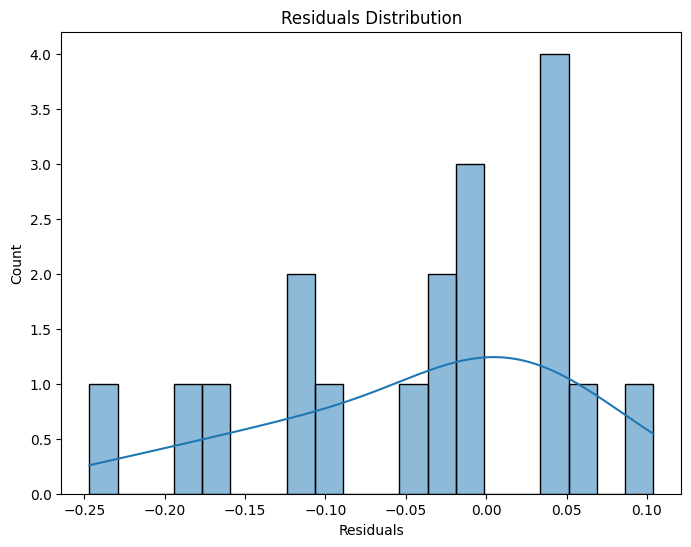

In [226]:
# Using
#  - early_d_pct
#  - early_r_pct
#  - early_pct
#  - prev_d_margin

# separate features and target
X = full_df[['early_d_pct', 'early_r_pct', 'early_pct', 'prev_d_margin']]
y = full_df['final_d_margin']

linear_regression(X, y)

R^2 score: 0.8762689288504011
Linear Regressor R^2: 0.7756809235272418 ± 0.14793535469714367


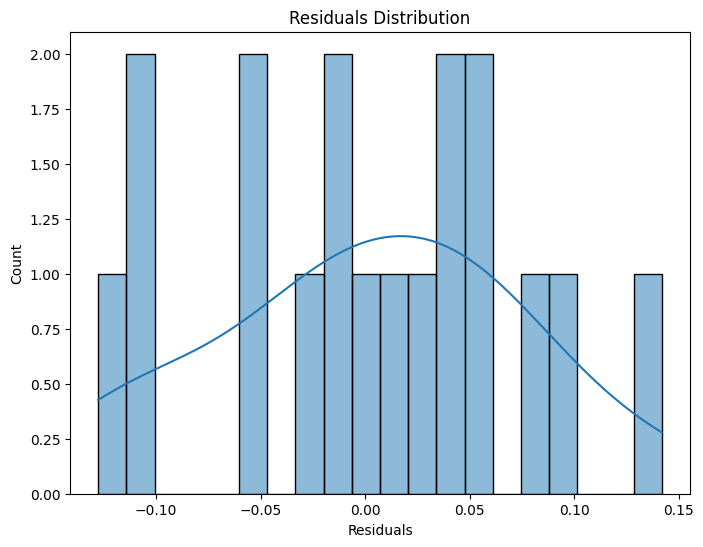

In [259]:
# Using
#  - early_d_pct
#  - early_r_pct
#  - early_pct

# separate features and target
X = full_df[['early_d_pct', 'early_r_pct', 'early_pct', 'prev_d_margin']]
y = full_df['final_d_margin']

linear_regression(X, y)

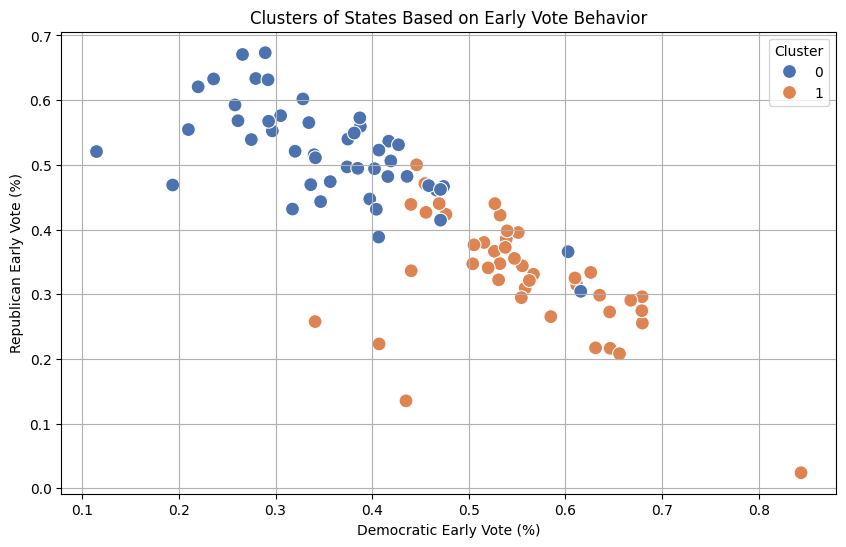


Cluster 0 states:
['Alaska', 'Alaska', 'Arizona', 'Arkansas', 'Arkansas', 'Florida', 'Florida', 'Georgia', 'Idaho', 'Idaho', 'Indiana', 'Indiana', 'Iowa', 'Iowa', 'Kansas', 'Kansas', 'Louisiana', 'Louisiana', 'Michigan', 'Montana', 'Montana', 'Nebraska', 'Nebraska', 'North Carolina', 'North Carolina', 'North Dakota', 'Ohio', 'Ohio', 'Oklahoma', 'Oklahoma', 'Pennsylvania', 'Pennsylvania', 'South Carolina', 'South Carolina', 'South Dakota', 'South Dakota', 'Tennessee', 'Tennessee', 'Texas', 'Texas', 'Utah', 'Utah', 'West Virginia', 'West Virginia', 'Wisconsin', 'Wyoming', 'Wyoming']

Cluster 1 states:
['Arizona', 'California', 'California', 'Colorado', 'Colorado', 'Connecticut', 'Connecticut', 'Delaware', 'Delaware', 'Georgia', 'Hawaii', 'Hawaii', 'Illinois', 'Illinois', 'Maine', 'Maine', 'Maryland', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Minnesota', 'Nevada', 'Nevada', 'New Hampshire', 'New Hampshire', 'New Jersey', 'New Jersey', 'New Mexico', 'New Mexico', 'New York', 

In [275]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering
features = full_df[['early_pct', 'early_d_margin', 'prev_d_margin']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2)
full_df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=full_df['early_d_pct'], 
    y=full_df['early_r_pct'], 
    hue=full_df['cluster'], 
    palette='deep', 
    s=100
)
plt.title('Clusters of States Based on Early Vote Behavior')
plt.xlabel('Democratic Early Vote (%)')
plt.ylabel('Republican Early Vote (%)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Print states by cluster
for cluster in range(2):
    print(f"\nCluster {cluster} states:")
    print(full_df[full_df['cluster'] == cluster]['state'].tolist())

### Re-run regression with clustered states

R^2 score: 0.3551806432730108
Linear Regressor R^2: 0.3701103459709735 ± 0.3538689443270266


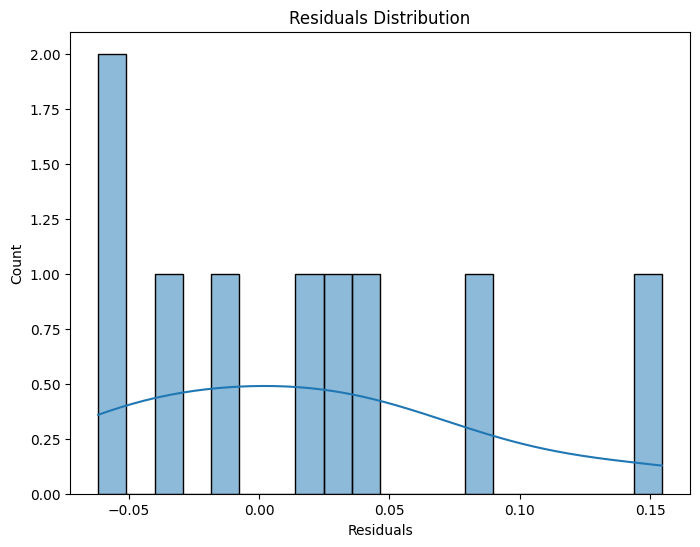


R^2 score: -1.0881654671575518
Linear Regressor R^2: 0.27965968229735416 ± 0.6306955771478056


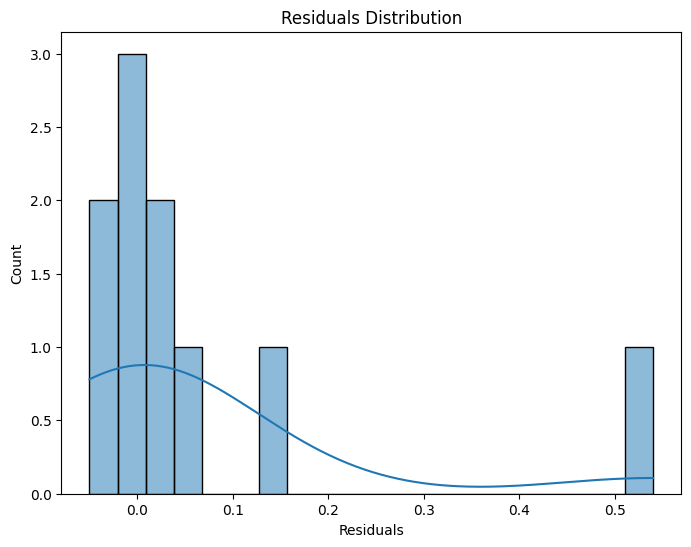

In [219]:
for cluster in range(2):
    df = full_df[full_df['cluster'] == cluster]

    # separate features and target
    X = df[['early_pct', 'early_d_pct', 'early_r_pct', 'prev_d_margin']]
    y = df['final_d_margin']
    
    linear_regression(X, y)
    print()

### Polynomial Regression

In [221]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# separate features and target
X = full_df[['early_d_margin', 'early_pct', 'prev_d_margin']]
y = full_df['final_d_margin']

# degree 2 polynomial
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)

# evaluate model
y_pred_poly = poly_model.predict(X)

scores = cross_val_score(poly_model, X, y, cv=5)
print(f"Polynomial R^2: {scores.mean()} ± {scores.std()}")

Polynomial R^2: 0.7487092594583179 ± 0.11937815401942647


### Random Forest Regressor

In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# separate features and target
X = full_df[['early_d_margin', 'early_pct', 'prev_d_margin']]
y = full_df['final_d_margin']

rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring="r2")
print(f"Random Forest R^2: {rf_scores.mean()} ± {rf_scores.std()}")

Random Forest R^2: 0.7321886291508999 ± 0.10670702588450003


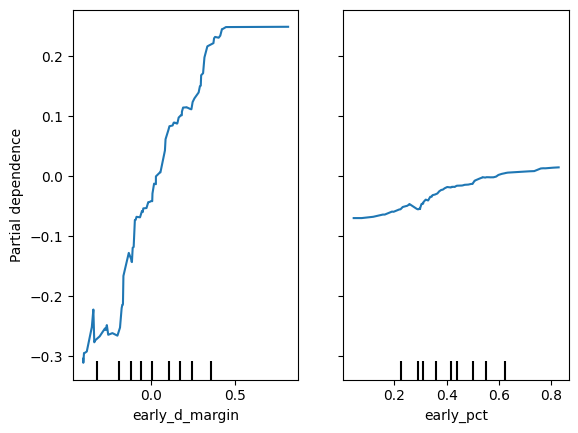

In [223]:
from sklearn.inspection import PartialDependenceDisplay

# separate features and target
X = full_df[['early_d_margin', 'early_pct', 'prev_d_margin']]
y = full_df['final_d_margin']

rf_model.fit(X, y)
PartialDependenceDisplay.from_estimator(rf_model, X, [0, 1])  # feature indices
plt.show()

In [224]:
from sklearn.svm import SVR

# separate features and target
X = full_df[['early_d_margin', 'early_pct', 'prev_d_margin']]
y = full_df['final_d_margin']

svr_model = SVR(kernel="rbf")
svr_scores = cross_val_score(svr_model, X, y, cv=5, scoring="r2")
print(f"SVR R^2: {svr_scores.mean()} ± {svr_scores.std()}")

SVR R^2: 0.7575866081791772 ± 0.14183968293419202


### Plotting Scores

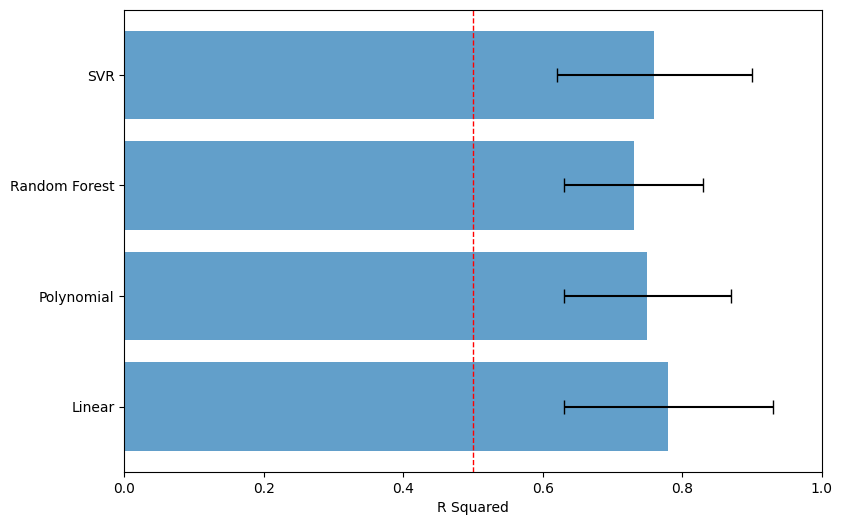

In [276]:
# data
models = ['Linear', 'Polynomial', 'Random Forest', 'SVR']
r_squared = [0.78, 0.75, 0.73, 0.76]  # mean R^2 values
std_dev = [0.15, 0.12, 0.1, 0.14]  # standard deviations

# create the plot
plt.figure(figsize=(9, 6))
plt.barh(models, r_squared, xerr=std_dev, capsize=5, alpha=0.7)
plt.xlabel('R Squared')
plt.xlim(0, 1)  # set x-axis limits for clarity

plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1, label='General Benchmark (0.5)')

# annotate values on bars
# for i, (r2, std) in enumerate(zip(r_squared, std_dev)):
#     plt.text(r2 + 0.1, i, f'{r2:.2f}', va='center', fontsize=10)

plt.show()